In [15]:
# Continue to analyse the famous iris dataset with a different machine learning approach: support vector machines

In [16]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [17]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [18]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [19]:
iris = datasets.load_iris()
print list(iris)
print list(iris.feature_names)
X = iris["data"][:,:2]  # sepal length, sepal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

['target_names', 'data', 'target', 'DESCR', 'feature_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25) #25% hold out for testing

svm_clf = Pipeline([
        ("scaler", StandardScaler()), # StandardScaler makes sure the data are standard normally distributed
        ("linear_svc", LinearSVC(C=1, loss="hinge")), # Alternatively, use SVC or SGDClassifier classes with different hyperparameters
    ])

# Fit the data from the training set
svm_clf.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [21]:
svm_clf.predict_proba([[5.5, 1.7]]) ### SVM classifiers do not output probabilities

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [22]:
# Test accuracy using the training set data (probably not the best idea!)
y_pred = svm_clf.predict(X_test)
print accuracy_score(y_test, y_pred)

0.7894736842105263


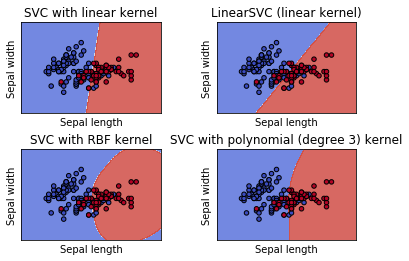

In [23]:
# Try different SVM classifiers

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train, y_train) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = iris["data"][:,0], iris["data"][:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel('Sepal length')
  ax.set_ylabel('Sepal width')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
plt.show()

In [24]:
# Train with different features

X = iris["data"][:, 2:4]# petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

In [25]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25) #25% hold out for testing

svm_clf = Pipeline([
        ("scaler", StandardScaler()), # StandardScaler makes sure the data are standard normally distributed
        ("linear_svc", LinearSVC(C=1, loss="hinge")), # Alternatively, use SVC or SGDClassifier classes with different hyperparameters
    ])

# Fit the data from the traning set
svm_clf.fit(X_train, y_train)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [26]:
y_pred = svm_clf.predict(X_test)
print accuracy_score(y_test, y_pred)

0.9473684210526315


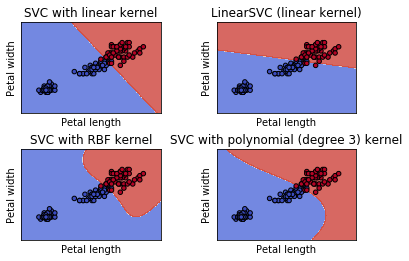

In [27]:
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X_train, y_train) for clf in models)

titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X2, X3 = iris["data"][:,2], iris["data"][:,3]
xx, yy = make_meshgrid(X2, X3)

for clf, title, ax in zip(models, titles, sub.flatten()):
  plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
  ax.scatter(X2, X3, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xlabel('Petal length')
  ax.set_ylabel('Petal width')
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title(title)
plt.show()